In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict

sys.path.append("..")

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/leul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from scripts.plot_utils import plot_pie_chart, plot_bar_chart

In [4]:
FILE_PATH = "../data/raw_analyst_ratings.csv"

df = pd.read_csv(FILE_PATH)
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
df["headline_length"] = df["headline"].str.len()
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [6]:
min_length = df["headline_length"].min()
max_length = df["headline_length"].max()

NUM_OF_BINS = 6

bins = np.linspace(min_length, max_length + 1, NUM_OF_BINS)
labels = ["Very Short", "Short", "Medium", "Long", "Very Long"]

df["headline_length_category"] = pd.cut(df["headline_length"], bins=bins, labels=labels, include_lowest=True)

df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,headline_length_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Very Short
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Very Short
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Very Short
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Very Short
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Very Short


/home/leul/projects/leuel/simple-vader/notebooks/../scripts/plot_utils.py:133: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


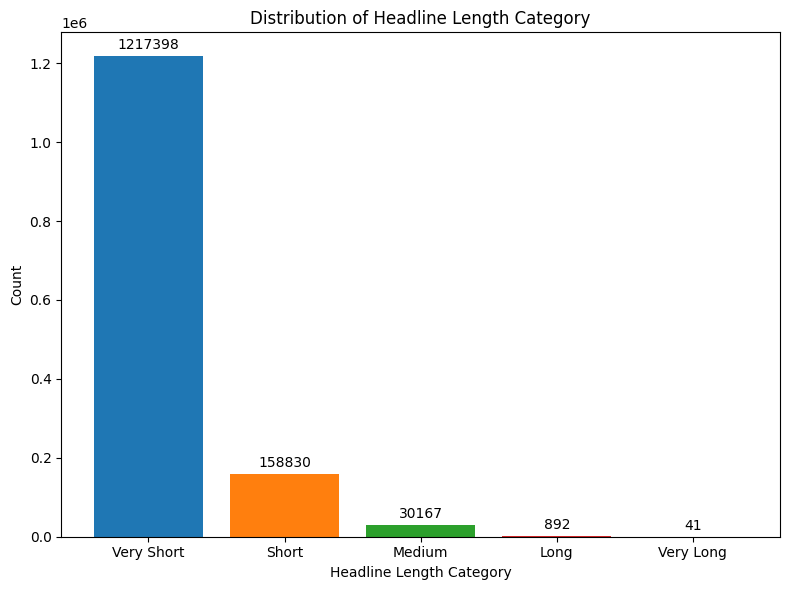

In [7]:
plot_bar_chart(df, "headline_length_category", labels)

### VADER Sentiment Scores

In [8]:
sia = SentimentIntensityAnalyzer()

def get_sentiment_scores(text: str) -> Dict[str, float]:
    if pd.isna(text) or text.strip == "":
        return { "pos": 0.0, "neg": 0.0, "neu": 0.0, "compound": 0.0 }
    return sia.polarity_scores(text)

In [9]:
sentiment_scores = df["headline"].apply(get_sentiment_scores)

df["sentiment_pos"] = sentiment_scores.apply(lambda x: x["pos"])
df["sentiment_neg"] = sentiment_scores.apply(lambda x: x["neg"])
df["sentiment_neu"] = sentiment_scores.apply(lambda x: x["neu"])
df["sentiment_compound"] = sentiment_scores.apply(lambda x: x["compound"])

In [11]:
df["sentiment_category"] = df["sentiment_compound"].apply(
    lambda comp: "Positive" if comp >= 0.05 else ("Negative" if comp <= -0.05 else "Neutral")
)

In [12]:
headline_colums = ["headline", "sentiment_compound", "sentiment_category"]

df[headline_colums].head()

,headline,sentiment_compound,sentiment_category
0,Stocks That Hit 52-Week Highs On Friday,0.000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.000,Neutral
2,71 Biggest Movers From Friday,0.000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,0.296,Positive


/home/leul/projects/leuel/simple-vader/notebooks/../scripts/plot_utils.py:133: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


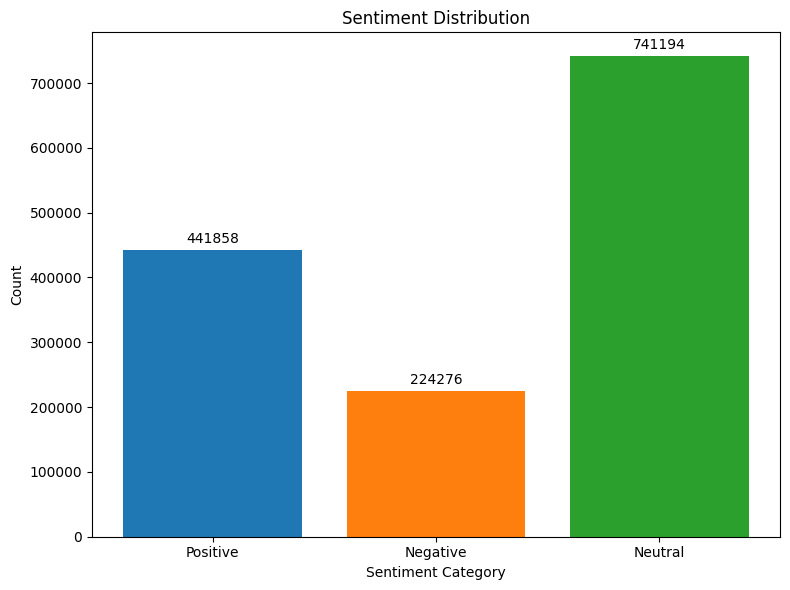

In [13]:
sentiment_labels = ["Positive", "Negative", "Neutral"]

plot_bar_chart(df[headline_colums], "sentiment_category", sentiment_labels, title="Sentiment Distribution")